## Content list

1. Import libraries and data
2. Create subset
3. Descomposition
4. Test for stationarity
5.  Stationarizing the Oil Production Data
6. Check for autocorrelations

# 1. Importing libraries and data

In [13]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [21]:
# Configure API key
quandl.ApiConfig.api_key = 'fdzyVQiuV2JgTKHx4yvs'

### Dataset Information
- **Source**: [JODI Oil World Database](https://data.nasdaq.com/databases/JODI)
- **Publisher**: Quandl via Nasdaq Data Link
- **Coverage**: Over 120 countries, monthly frequency from January 2002 onward
- **Product**: Crude Oil
- **Flow**: Production
- **Units**: Thousand Barrels per Day (kb/d)

This data is sourced from the Joint Organisations Data Initiative (JODI), contributed by member organizations including OPEC, IEA, EUROSTAT, APEC, GECF, UNSD, and others. It covers more than 90% of the world’s energy supply and demand.

In [35]:
path= r'C:\Users\beaac\Desktop\oil'

In [41]:
oil_df= pd.read_csv(os.path.join(path, 'oil.csv'))

In [43]:
oil_df.head(5)

,energy,code,country,date,value,notes
0,OIL,CRCSBK,ARE,2002-01-31,7596.0000,3
1,OIL,CRCSKB,ARE,2002-01-31,0,3
2,OIL,CRCSKD,ARE,2002-01-31,x,3
3,OIL,CRCSKL,ARE,2002-01-31,0,3
4,OIL,CRCSKT,ARE,2002-01-31,0,3


In [45]:
oil_df.shape

(20924468, 6)

In [47]:
oil_df.columns

Index(['energy', 'code', 'country', 'date', 'value', 'notes'], dtype='object')

In [51]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20924468 entries, 0 to 20924467
Data columns (total 6 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   energy   object
 1   code     object
 2   country  object
 3   date     object
 4   value    object
 5   notes    int64 
dtypes: int64(1), object(5)
memory usage: 957.8+ MB


# 2. Subsetting,wrangling, and cleaning time-series data


In [61]:
# Subset by country = indicador code
usa_subset = oil_df[
    (oil_df["country"] == "USA") &
    (oil_df["code"].str.startswith("CR")) & 
    (oil_df["code"].str.contains("PR")) &
    (oil_df["code"].str.endswith("KD"))  # matches thousand barrels/day
]


In [63]:
usa_subset.head(6)

,energy,code,country,date,value,notes
6026412,OIL,CRPRKD,USA,2002-01-31,5847.5806,1
6026462,OIL,CRPRKD,USA,2002-02-28,5871.3571,1
6026512,OIL,CRPRKD,USA,2002-03-31,5883.4516,1
6026562,OIL,CRPRKD,USA,2002-04-30,5858.7000,1
6026612,OIL,CRPRKD,USA,2002-05-31,5923.7097,1
6026662,OIL,CRPRKD,USA,2002-06-30,5915.3333,1


In [65]:
usa_subset.dtypes

energy     object
code       object
country    object
date       object
value      object
notes       int64
dtype: object

## Cleaning subset

In [69]:
#convert date to datime format
usa_subset['date']= pd.to_datetime(usa_subset['date'])

In [71]:
#convert vaue to float64
usa_subset['value']=pd.to_numeric(usa_subset['value'])

In [73]:
usa_subset.dtypes

energy             object
code               object
country            object
date       datetime64[ns]
value             float64
notes               int64
dtype: object

In [79]:
#check for duplicates 
dups= usa_subset[usa_subset.duplicated()]
print (dups)

Empty DataFrame
Columns: [energy, code, country, date, value, notes]
Index: []


There are no duplicated

In [84]:
# check for missing values
usa_subset.isnull().sum ()

energy     0
code       0
country    0
date       0
value      0
notes      0
dtype: int64

There are no missing values

In [87]:
# Check for mixed-type data
for col in usa_subset.columns.tolist():
  weird = (usa_subset[[col]].map(type) != usa_subset[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (usa_subset[weird]) > 0:
    print (col)

There is no mixed type data

In [90]:
# Group by date and calculate the mean oil production per day

usa_grouped = usa_subset.groupby("date")["value"].mean().reset_index()


In [92]:
usa_grouped.head()

,date,value
0,2002-01-31,5847.5806
1,2002-02-28,5871.3571
2,2002-03-31,5883.4516
3,2002-04-30,5858.7000
4,2002-05-31,5923.7097


In [98]:
# set the date column as the index
from datetime import datetime
usa_grouped['datetime']= pd.to_datetime(usa_grouped['date'])
usa_grouped = usa_grouped.set_index('datetime') # Set the datetime as the index of the dataframe
usa_grouped.drop(['date'], axis=1, inplace=True) # Drop the "date" column
usa_grouped.head()

,value
datetime,
2002-01-31,5847.5806
2002-02-28,5871.3571
2002-03-31,5883.4516
2002-04-30,5858.7000
2002-05-31,5923.7097


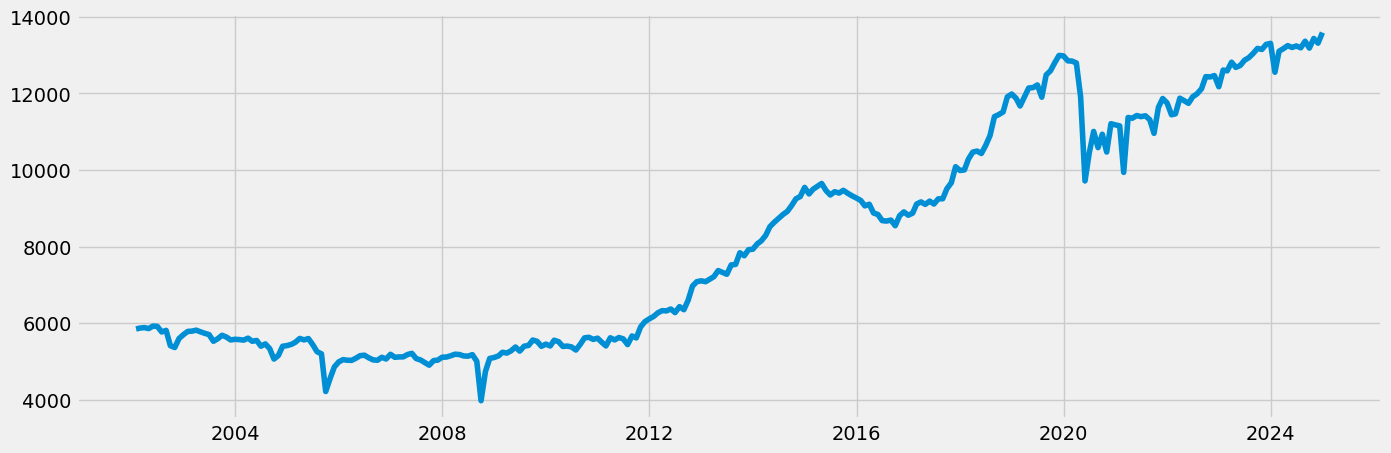

In [102]:
#plot the data

plt.figure(figsize=(15,5),dpi=100)
plt.plot(usa_grouped)

My analysis focuses in the long tern traectory of U.S.crude oil production, starting from early 2002. from 2002-2008 production levels hover steadily with minimal volatility. from 2008-2019 production begings a rapid climb, in 2020 a dramatic dip is observed showcasting the global economic slowdown collapse during the pandemic and from 2021 till 2022 the series esbilizes, approaching levels near 13,000 kb/d, indicating recovery efforts.

# 3. Time-series analysis: Descomposition

In [108]:
# Decompose the data's components
decomposition = sm.tsa.seasonal_decompose(usa_grouped, model='additive')

In [110]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

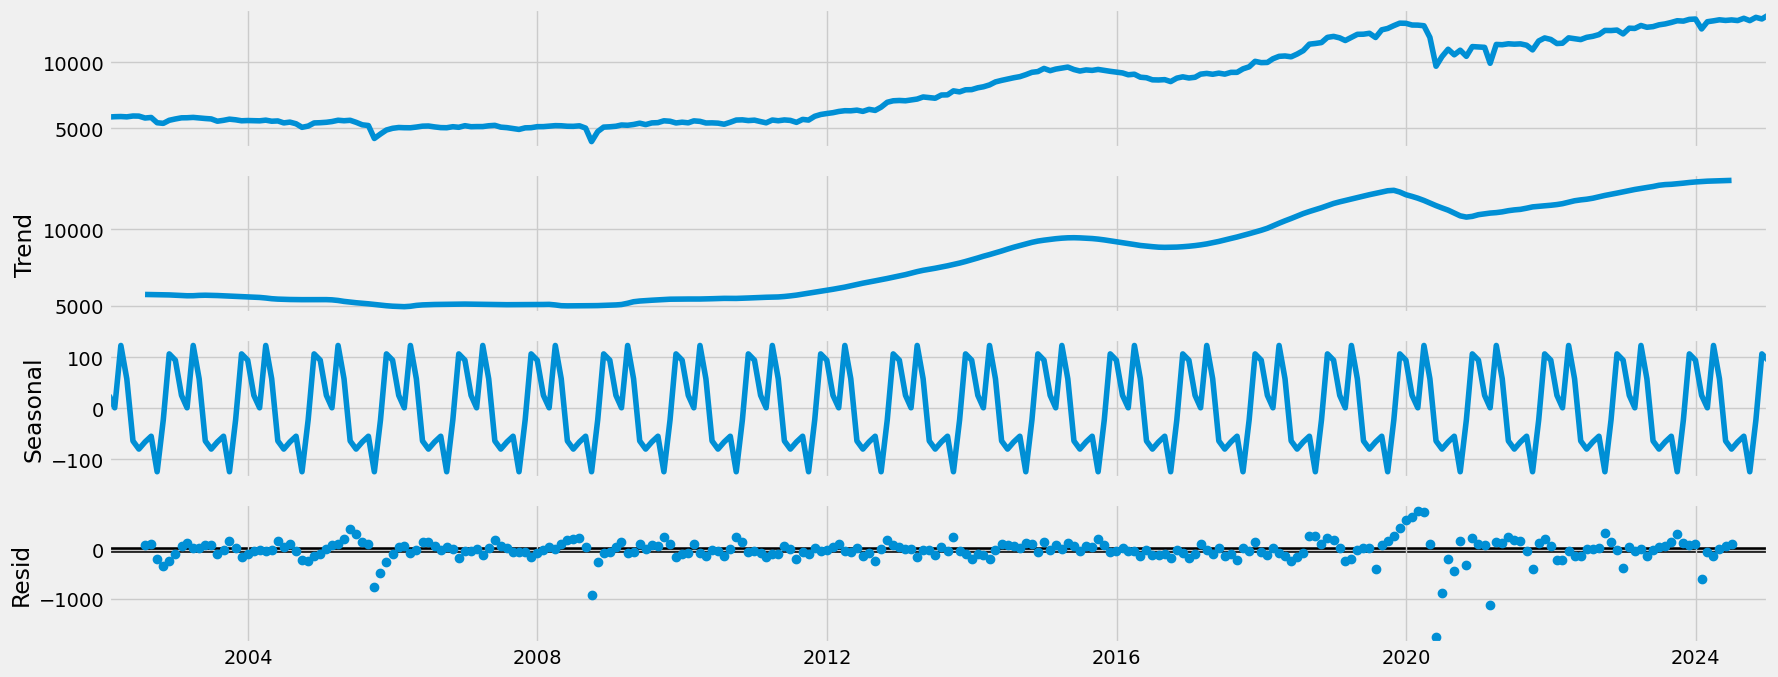

In [112]:
# Plot the separated components

decomposition.plot()
plt.show()

Insights:

- The first chart is the Level. This is ust the data itself including all its components.
- The second chart is the Trend. shows a strong and sustained increase in production, especially from 2009.
- the third chart is Seasonal component. Revelas a consistent repeating pattern year over year, which means seasonal variation is predictable and steady.
- The residual component. Is mostly scattered around zero, indicating that the model fits well.
- Given the presence of both trend and seasonality, this data is cnsidered non-stationary.

# 4. Testing for stationarity

In [116]:
# Conduct a Dickey-Fuller test to check for stationarity

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): 
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

# Apply the test on the time series
dickey_fuller(usa_grouped['value'])

Dickey-Fuller Stationarity Test:
Test Statistic                   0.475994
p-value                          0.984125
Number of Lags Used              4.000000
Number of Observations Used    271.000000
Critical Value (1%)             -3.454713
Critical Value (5%)             -2.872265
Critical Value (10%)            -2.572485
dtype: float64


Null hypothesis: The presence of a root unit. (It's non-stationary)

The test statistic is greater than the critical value (5%). Since the test statistic exceeds these critical values, we cannot reject the null hypothesis. This indicated that there is a unit root in the data, confirming that it is non-stationary.


# 5. Stationarizing the Oil Production Data

In [120]:
# Stationarize the data by using the differencing technique
data_diff = usa_grouped - usa_grouped.shift(1)

# Remove any missing values as a result of the differencing 
data_diff.dropna(inplace=True)

In [122]:
data_diff.head()

,value
datetime,
2002-02-28,23.7765
2002-03-31,12.0945
2002-04-30,-24.7516
2002-05-31,65.0097
2002-06-30,-8.3764


In [124]:
data_diff.columns

Index(['value'], dtype='object')

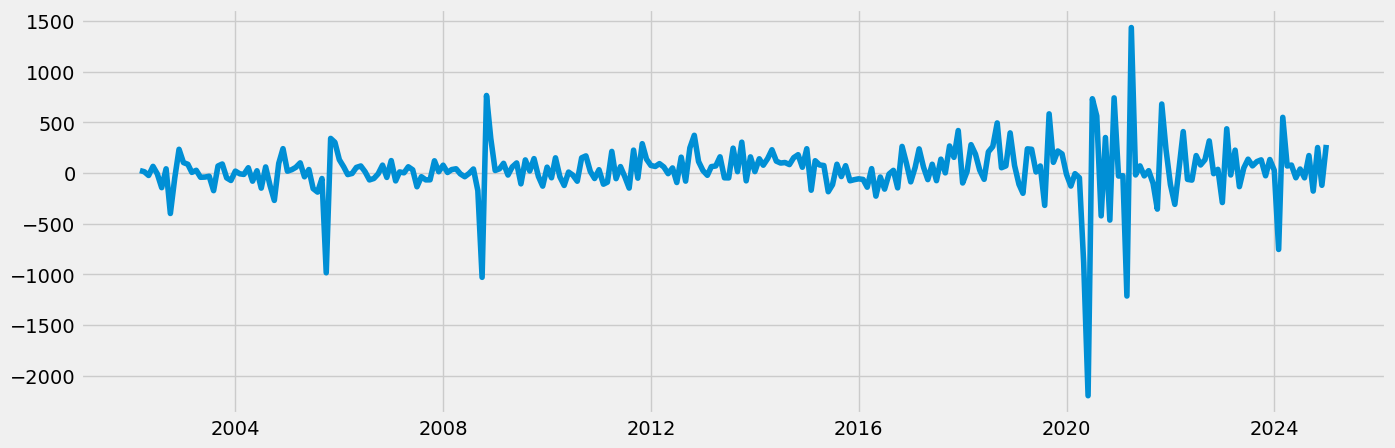

In [126]:
#plot the time series wih diferencing technique
plt.figure(figsize=(15,5), dpi =100)
plt.plot(data_diff)

In [128]:
#recheck for stationarity by running another Dickecy_Fuller test
dickey_fuller(data_diff['value'])

Dickey-Fuller Stationarity Test:
Test Statistic                -8.423911e+00
p-value                        1.950023e-13
Number of Lags Used            3.000000e+00
Number of Observations Used    2.710000e+02
Critical Value (1%)           -3.454713e+00
Critical Value (5%)           -2.872265e+00
Critical Value (10%)          -2.572485e+00
dtype: float64


The test statistic is -8.42 way lower that the critical value (5%)
- Reject the null hypothesis- there is no unit root, and your data is stationary

# 6. Check for Autocorrelations


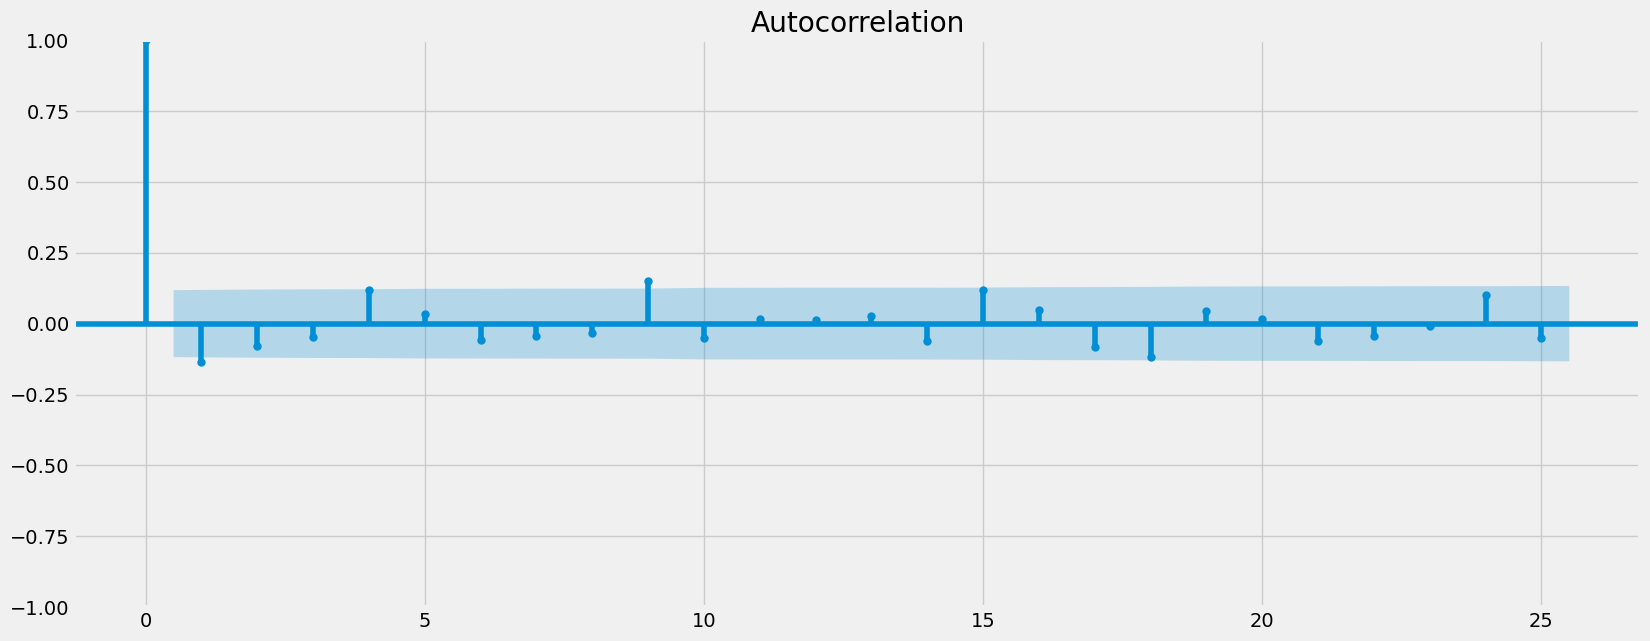

In [136]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_diff)
plt.show()